In [44]:
import os
import logging
import pandas as pd
from slack_sdk import WebClient  # Import WebClient from Python SDK (github.com/slackapi/python-slack-sdk)
import time
import matplotlib.pyplot as plt
import numpy as np

## Read Conversations

conversations = pd.read_csv('~/workspace/analytics/data/conversations_history.csv')

## Read Users

users = pd.read_csv('~/workspace/analytics/data/user_list_data.csv')

## Read Channels

channels = pd.read_csv('~/workspace/analytics/data/channels.csv')



In [6]:
# Find Last 50 MActive Users

conversations_max = conversations.groupby(['user'], as_index = False).agg({'ts':'max'})
conversations_max.sort_values(by = 'ts', ascending = False, inplace = True)
conversations_joined = pd.merge(conversations_max, users, how = 'left', left_on = ['user'], right_on = ['id'])

conversations_joined[["user", "ts"]].head()


,user,ts
0,U02DL728MQR,2021-10-04 23:26:52.052299976
1,U02HB9WKA80,2021-10-04 23:23:08.041500092
2,U02GX9HUN8Y,2021-09-30 14:11:02.000200033
3,UJSRTPXV5,2021-09-30 06:31:24.031599997
4,UP84C9TU0,2021-09-30 05:02:02.029400110


/var/folders/gb/vkkwn_y50qlcw8ck_mh4lbb00000gn/T/ipykernel_1372/1518412320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_join['ts'] = pd.to_datetime(general_join['ts'])


<AxesSubplot:title={'center':'~10 members join per week'}, xlabel='ts'>

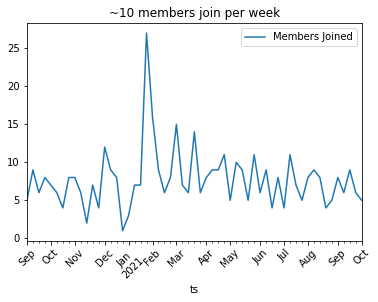

In [51]:
# Weekly Joins to General

general_join = conversations[(conversations['channel'] == 'C0431NL8L') & (conversations['text'].str.contains('join', na=False))]
general_join['ts'] = pd.to_datetime(general_join['ts'])

weekly = general_join.groupby([pd.Grouper(key='ts', freq='W-MON')])['user'].count().reset_index().sort_values("ts", ascending = False)


weekly_l12 = weekly[weekly["ts"] > '2020-09-01']
weekly_l12.plot(kind = 'line', x = 'ts', y = 'user', rot = 45, label = 'Members Joined', title = '~10 members join per week')
